# **사전준비 for windows**
window 기본 폰트인 맑은고딕으로 설정한다. 
window에 설치된 jupyter notebook kernel에서 실행할 때 사용한다.
(colab으로 진행할 경우에는 '사전준비 for colab' 만 실행하면 된다

In [1]:
# 관련 라이브러리 임포트
import matplotlib.font_manager as fm  # 폰트 관련 
import matplotlib.pyplot as plt   # 그래프 내 설정
import matplotlib as mpl  # 기본 설정 


In [2]:
# 폰트의 경로를 통해 사용할 폰트 (맑은고딕)를 지정한다.

path = r'C:\Windows\Fonts\malgun.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
mpl.rc('font', family=font_name)    # 맑은고딕으로 설정
mpl.rcParams['axes.unicode_minus'] = False  # - 부호 오류 보정

Malgun Gothic


# **사전준비 for colab**
matplotlib 그래프 내 한글 글꼴 표시를 위한 설치 및 런타임 다시 시작과 폰트 설정 작업을 단계별로 수행한다.

## [1] 폰트 설치 (나눔글꼴) 및 폰트매니저 재구성

In [ ]:
####  없어도 됨 [폰트개수 확인용]
# 시스템내 최초 설치된 폰트개수 확인 - 처음에는 기본 폰트만 설치됨

import matplotlib.font_manager as fm  # 폰트 관련 용도
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

In [ ]:
# 나눔고디 폰트 설치

!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
####  없어도 됨 [폰트개수 확인용]
# 설치 후  폰트 개수 확인,  늘어 난 것을 알 수 있다.

import matplotlib.font_manager as fm  # 폰트 관련 용도
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

In [ ]:
# 폰트 매니저 재설정을 위한 명령문 수행 : fm._rebuild()
import matplotlib.font_manager as fm
fm._rebuild()

## [2] 폰트 인식을 위한  '런타임 다시시작'
  - '런타임' - '런타임 다시 시작' 
  - 또는 'Ctrl-M'


## [3] 런타임 재시작 이후 
   - 폰트  설정 및 마이너스 부호 오류 처리
   - **시작 이후에는 본 셀 이후 부터 실행한다.**

In [ ]:
# 관련 라이브러리 임포트
import matplotlib.font_manager as fm  # 폰트 관련 
import matplotlib.pyplot as plt   # 그래프 내 설정
import matplotlib as mpl  # 기본 설정 


In [ ]:
####  없어도 됨 [폰트개수 확인용]
# 런타임 다시 시작 이후, 설치 된 폰트 개수가 증가 한 상태임을 알 수 있다. 
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

In [ ]:
# 폰트의 경로를 통해 사용할 폰트 (나눔고딕)를 지정한다.
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 나눔글꼴중 사용할 폰트의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# 마이너스 부호 처리에 오류가 있는 경우를 방지 하기 위한 설정
mpl.rcParams['axes.unicode_minus'] = False 

# **분석 수업**
- 이후 정상적인 코드 작성하면 됨

In [ ]:
"""
online 판매 데이터 분석
  판매매체별 : 2개 채널
       '모바일쇼핑', '인터넷쇼핑'
  상품군별 : 23개 상품군
       'e쿠폰서비스', '가구', '가방', '가전·전자·통신기기', '기타', '기타서비스',
       '농축수산물','문화 및 레저서비스', '사무·문구', '생활용품', '서적', 
       '스포츠·레저용품', '신발', '아동·유아용품','애완용품', '여행 및 교통서비스', 
       '음·식료품', '음식서비스', '의복', '자동차 및 자동차용품',
       '컴퓨터 및 주변기기', '패션용품 및 액세서리', '화장품'
  판매연월 : 32개월
    2018년 1월~ 2020년 8월  

 
 - 데이터 자체의 이해를 위한 분석
  0.데이터 적재 및 형태 가공  
  1.기초분석
  2.상품군별 온라인 판매 추이 (시계열)
  3.판매매체별 상품군별 특성 분석
  4. 판매매체별 상품군별 변화추이 분석

"""


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [4]:
# category colors

prod_colors = ['yellow', 'greenyellow', 'yellowgreen','darkslategray','limegreen',
               'lime', 'forestgreen','darkgreen', 'darkcyan','darkblue',
               'teal', 'blue','mediumblue','olivedrab','purple',
                'darkkhaki','tan', 'maroon', 'orange','crimson',
               'sienna', 'tomato', 'darksalmon']

channel_colors = [ 'red', 'blue']

# 0 데이터 적재 및 형태 가공

In [5]:
online_raw = pd.read_excel('https://github.com/sagelab4data/firsttest/blob/main/OnlineSales-Product.xlsx?raw=true')
online_raw.tail(3)

,상품군별,판매매체별,2018. 01,2018. 02,2018. 03,2018. 04,2018. 05,2018. 06,2018. 07,2018. 08,...,2019. 11,2019. 12,2020. 01,2020. 02,2020. 03,2020. 04,2020. 05,2020. 06,2020. 07,2020. 08
69,기타,계,227959,224621,277245,221213,222905,200405,201779,202654,...,258443,267018,394715,380936,387031,318471,389398,365383,380177,541561
70,NaN,인터넷쇼핑,110089,91943,129620,102789,105807,95910,95215,95804,...,153315,158102,156143,162845,185529,136878,162870,146319,148898,243350
71,NaN,모바일쇼핑,117870,132678,147626,118425,117098,104495,106564,106850,...,105128,108916,238572,218091,201502,181594,226529,219064,231279,298211


In [6]:
# 상품군별, 판매매체별 은 컬럼으로 구성 되어 있으나, 
# 컬럼의 값이여야 하는 판매연월이 컬럼명이 되어 구성 되어 있다. 
online_raw.shape

(72, 34)

In [7]:
# 엑셀이 집계 컬럼 형태여서 상품군별에 누락값이 있다. 
# 첫 번째 상품군별 컬럼에 NaN을 ffill 로 채우기
online_raw.상품군별.fillna(method = 'ffill', inplace = True)
online_raw.head(10)

,상품군별,판매매체별,2018. 01,2018. 02,2018. 03,2018. 04,2018. 05,2018. 06,2018. 07,2018. 08,...,2019. 11,2019. 12,2020. 01,2020. 02,2020. 03,2020. 04,2020. 05,2020. 06,2020. 07,2020. 08
0,합계,계,9027008,8207296,9375766,9034274,9363224,8965075,9653420,9270381,...,12852096,12684652,12304762,11963252,12624728,12065537,12742648,12687000,12981856,14383291
1,합계,인터넷쇼핑,3689807,3300302,3869098,3628814,3686046,3507124,3709400,3499822,...,4434397,4349481,4081181,3850850,4138678,4023773,4056283,4195403,4193048,5056746
2,합계,모바일쇼핑,5337201,4906994,5506668,5405460,5677178,5457951,5944021,5770559,...,8417698,8335170,8223581,8112402,8486051,8041765,8686365,8491597,8788808,9326545
3,컴퓨터 및 주변기기,계,511674,453408,504061,409054,404235,371844,404250,418905,...,524269,550826,550217,616468,687759,645276,590327,535105,608124,670431
4,컴퓨터 및 주변기기,인터넷쇼핑,324233,275786,310948,243815,237559,220404,239475,249200,...,303267,335880,310761,341426,387538,364862,349022,322247,367710,407877
5,컴퓨터 및 주변기기,모바일쇼핑,187441,177621,193113,165240,166676,151440,164775,169705,...,221003,214947,239456,275042,300221,280414,241305,212858,240413,262554
6,가전·전자·통신기기,계,858256,770401,946627,945259,1026133,963674,1188194,960593,...,1379205,1247059,1158549,1392368,1480356,1382427,1597151,1566781,1439150,1818273
7,가전·전자·통신기기,인터넷쇼핑,398999,351716,435766,420663,447810,424143,511557,424778,...,568971,527530,453498,563716,598541,578468,619027,603684,557778,753163
8,가전·전자·통신기기,모바일쇼핑,459257,418685,510861,524596,578323,539531,676637,535814,...,810234,719530,705051,828652,881815,803959,978124,963098,881372,1065111
9,서적,계,171254,147783,191597,144169,129125,117353,148060,149224,...,148213,179658,172311,191346,255531,206282,170715,171513,187840,221245


In [8]:
# data 형태를 tidy 한 형태로 변경 한다. 
online_melted = online_raw.melt(id_vars = ['상품군별', '판매매체별'] , 
                var_name = '판매연월', 
                value_name = '판매액' )
online_melted.head()

,상품군별,판매매체별,판매연월,판매액
0,합계,계,2018. 01,9027008
1,합계,인터넷쇼핑,2018. 01,3689807
2,합계,모바일쇼핑,2018. 01,5337201
3,컴퓨터 및 주변기기,계,2018. 01,511674
4,컴퓨터 및 주변기기,인터넷쇼핑,2018. 01,324233


In [9]:
# 중복된 정보인 상품군별 = '합계' , 판매매체별  = '계'  삭제 
online = online_melted.mask (online_melted.상품군별 == '합계')\
             .mask (online_melted.판매매체별 == '계')\
             .dropna()

# 판매연월은 일자 타입으로 변경
online.판매연월 = online.판매연월.astype(np.datetime64)
online.head()   # 분석할 DF

,상품군별,판매매체별,판매연월,판매액
4,컴퓨터 및 주변기기,인터넷쇼핑,2018-01-01,324233.0
5,컴퓨터 및 주변기기,모바일쇼핑,2018-01-01,187441.0
7,가전·전자·통신기기,인터넷쇼핑,2018-01-01,398999.0
8,가전·전자·통신기기,모바일쇼핑,2018-01-01,459257.0
10,서적,인터넷쇼핑,2018-01-01,107123.0


# 1. 기초분석

In [10]:
online.shape  # 23개 상품군 * 32개월 * 2개 매체  = 1472행

(1472, 4)

In [11]:
online.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 4 to 2303
Data columns (total 4 columns):
상품군별     1472 non-null object
판매매체별    1472 non-null object
판매연월     1472 non-null datetime64[ns]
판매액      1472 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 57.5+ KB


In [12]:
online.describe().astype(int)

,판매액
count,1472
mean,237996
std,243882
min,6997
25%,61481
50%,135467
75%,332481
max,1578540


In [13]:
online.describe(include = ['object', np.datetime64])

,상품군별,판매매체별,판매연월
count,1472,1472,1472
unique,23,2,32
top,자동차 및 자동차용품,모바일쇼핑,2019-07-01 00:00:00
freq,64,736,46
first,NaN,NaN,2018-01-01 00:00:00
last,NaN,NaN,2020-08-01 00:00:00


# 2. 상품군별 온라인 판매 추이 (시계열)

In [14]:
online_prod = online.groupby(['상품군별', '판매연월']).sum().unstack('상품군별')
online_prod.tail()

판매액                                                     \
상품군별          e쿠폰서비스        가구        가방 가전·전자·통신기기        기타     기타서비스   
판매연월                                                                      
2020-04-01  334079.0  405815.0  193228.0  1382427.0  318472.0  114533.0   
2020-05-01  339657.0  403437.0  219456.0  1597151.0  389399.0   89885.0   
2020-06-01  309219.0  400227.0  234031.0  1566782.0  365383.0   94212.0   
2020-07-01  332097.0  385936.0  232976.0  1439150.0  380177.0   99390.0   
2020-08-01  416082.0  428032.0  223747.0  1818274.0  541561.0  204894.0   

                                                     ...                     \
상품군별           농축수산물 문화 및 레저서비스    사무·문구       생활용품  ...   아동·유아용품     애완용품   
판매연월                                                 ...                      
2020-04-01  468172.0    25644.0  85429.0  1091464.0  ...  409942.0  90324.0   
2020-05-01  416900.0    48721.0  85990.0  1160123.0  ...  412804.0  90436.0   
2020-06-01  409076.0    43240.0  83761.0  1174166.0  ...  379138.0  87956.0   
2020-07-01  454495.0    75077.0  87116.0  1219998.0  ...  385852.0  95962.0   
2020-08-01  522513.0    85419.0  86145.0  1355937.0  ...  397964.0  99439.0   

                                                                               \
상품군별       여행 및 교통서비스      음·식료품      음식서비스         의복 자동차 및 자동차용품 컴퓨터 및 주변기기   
판매연월                                                                            
2020-04-01   440571.0  1520093.0  1263018.0  1182707.0    132380.0   645276.0   
2020-05-01   557450.0  1477572.0  1320396.0  1367346.0    142250.0   590327.0   
2020-06-01   598033.0  1459395.0  1252411.0  1349828.0    259708.0   535105.0   
2020-07-01   794327.0  1609929.0  1377846.0  1120663.0    156969.0   608123.0   
2020-08-01   789487.0  1750994.0  1672953.0   951507.0    212065.0   670431.0   

                                   
상품군별       패션용품 및 액세서리        화장품  
판매연월                               
2020-04-01    168913.0   961303.0  
2020-05-01    193233.0   934082.0  
2020-06-01    191421.0   984010.0  
2020-07-01    206945.0  1005225.0  
2020-08-01    193851.0  1100624.0  

[5 rows x 23 columns]

In [15]:
online_prod.columns = online_prod.columns.levels[1]

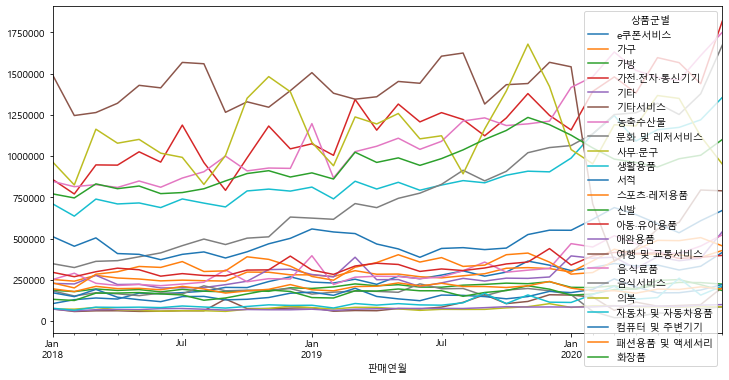

In [16]:
# 각 상품군별 추세, 
# 하나의 그래프에 그리면 모두가 혼합되어 알아보기가 어렵다. 

online_prod.plot(figsize = (12,6))


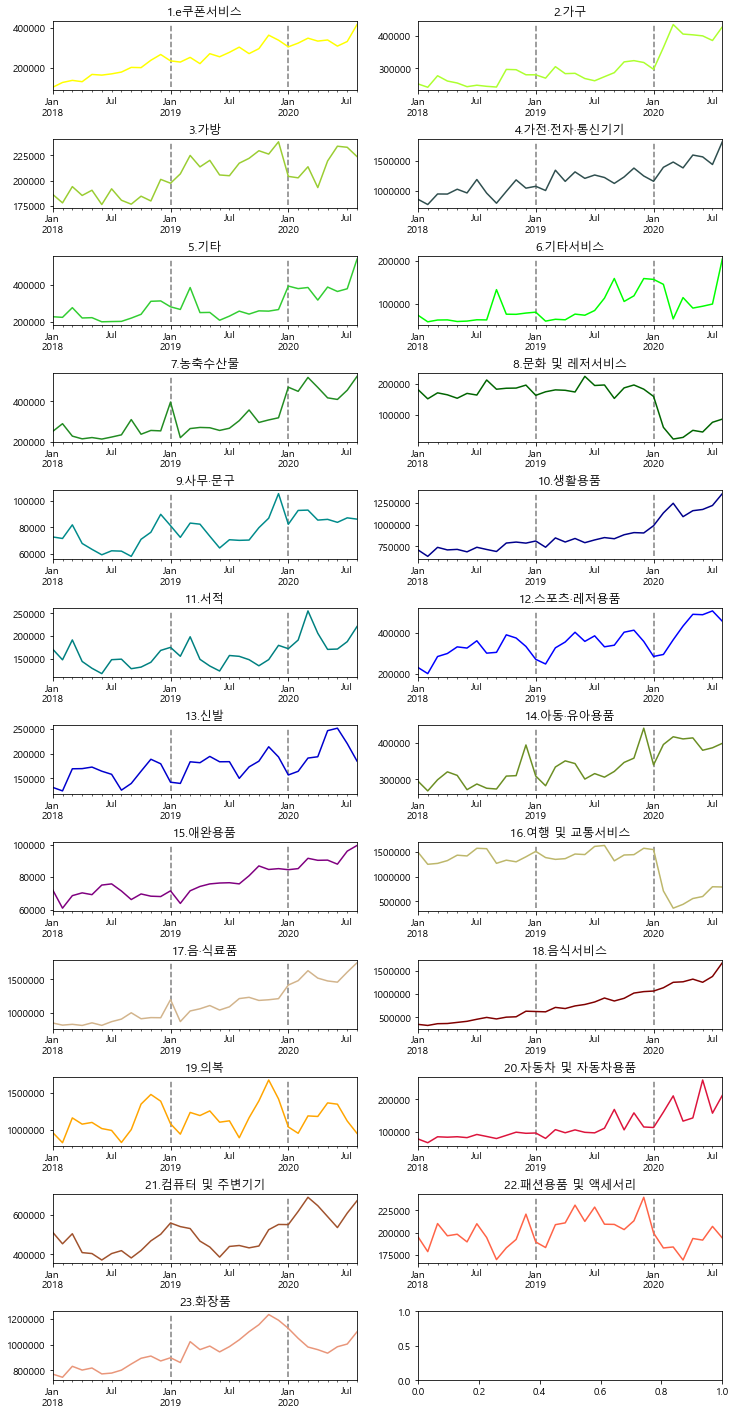

In [17]:
###  상품군별 판매 동향 추이
### Q1. 코로나 이후 급격하게 성장한 제품군은?
### Q2. 코로나로 인하여 제품 판매가 현저하게 줄어든 제품군은?
### Q3. 원래 부터 성장세였던 제품군은?
### Q4. 계절성이 있는 제품군은?
### Q5. 21.컴퓨터 및 주변 기기에 판매동향에 대해서 해석해보라.
### Q6. 14.아동유아용품, 19.의복 과 22.패션용품 및 액세서리 에서 나타나는 현상의 공통점과 차이점을 논해보라


fig, ax = plt.subplots(len (online_prod.columns)//2 +1 ,2 , figsize = (12, 25))
plt.subplots_adjust(hspace=0.7)

x1 = np.datetime64('2019-01-01')
x2 = np.datetime64('2020-01-01')

axe = ax.flat
for i, col in enumerate (online_prod.columns) :
    online_prod[col].plot(ax = axe[i], title = str(i+1) + '.'+ col, color = prod_colors[i])
    axe[i].xaxis.label.set_visible(False)
    ymin = online_prod[col].min()
    ymax = online_prod[col].max()
    axe[i].vlines(x = [x1, x2], ymin = ymin, ymax= ymax, color = 'gray', linestyle = '--')
    

# 3. 판매매체별 상품군별 특성 분석

In [18]:
# 데이터를 상품군별, 판매연월별 모바일쇼핑, 인터넷 쇼핑 형태로 정리한다. 

online_channel = online.groupby(['판매매체별','상품군별', '판매연월'])\
                        .sum().unstack('판매매체별')
online_channel.columns = online_channel.columns.levels[1]
online_channel.reset_index (inplace = True)
online_channel.columns.name = None
online_channel.tail()

,상품군별,판매연월,모바일쇼핑,인터넷쇼핑
731,화장품,2020-04-01,366354.0,594949.0
732,화장품,2020-05-01,409988.0,524094.0
733,화장품,2020-06-01,415458.0,568552.0
734,화장품,2020-07-01,404695.0,600530.0
735,화장품,2020-08-01,402857.0,697767.0


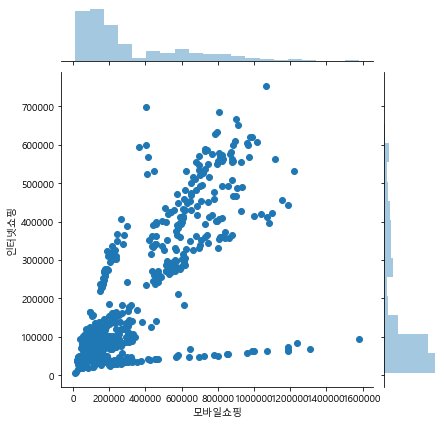

In [19]:
## 모바일과 인터넷의 판매 비율은 일정할까?
## 모두 비슷한 비율이라면 비교적 일직선에 수렴할 것이다. 
## 여러 기울기가 관측되므로, 아무래도 몇 가지 유형이 있는듯 하다. 

sns.jointplot(data = online_channel, x = '모바일쇼핑', y = '인터넷쇼핑')

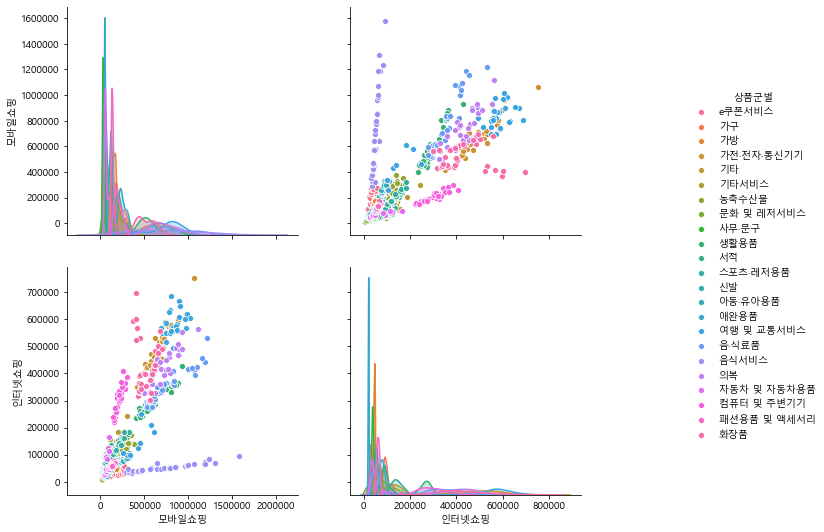

In [20]:
# 상품군별로 기울기가 차이가 있을 것으로 예상되므로 상품군별색을 분류해서 볼수 있는 
# pairplot을 수행해 본다. 
# 좌하단 차트를 보면 상품군별로 모방일을 더 사용하거나 
# 인터넷을 더 사용하는 제품군의 차이가 있어보인다. 

## 추가로... 상품군별로는 대체로 직선형태로 보이므로 모바일채널이 증가하거나 감소하는 경우는 
## 적을 것으로 예상된다. 한쪽 채널의 비중 변화가 있으면 직선이 아니라 휘는 모습이 관찰 될 것이다. 


g=sns.pairplot(online_channel, hue = '상품군별')
g.fig.set_size_inches(12,8)



In [21]:
## 상품군별 모바일/인터넷 채널 비율을 비교 하기 위해서 상품군별 모바일비율, 인터넷비율을 구하고
## 상품군 판매규모순으로 정렬한다.  ( 매체 선택에 판매규모가 관계가 있는지 판단하기 위해서...)

online_channel2 = online_channel.groupby('상품군별')[['모바일쇼핑','인터넷쇼핑']].sum()
online_channel2['온라인합계']= online_channel2.모바일쇼핑 + online_channel2.인터넷쇼핑
online_channel2['모바일비율']= online_channel2.모바일쇼핑 / online_channel2.온라인합계
online_channel2['인터넷비율']= online_channel2.인터넷쇼핑 / online_channel2.온라인합계
online_channel2.sort_values('온라인합계', inplace = True)  ## 판매액순으로 정렬
online_channel2.tail()

,모바일쇼핑,인터넷쇼핑,온라인합계,모바일비율,인터넷비율
상품군별,,,,,
화장품,16574039.0,13804084.0,30378123.0,0.545591,0.454409
음·식료품,24838263.0,11432325.0,36270588.0,0.684805,0.315195
의복,23123808.0,13726459.0,36850267.0,0.627507,0.372493
가전·전자·통신기기,21957496.0,16114904.0,38072400.0,0.576730,0.423270
여행 및 교통서비스,24105518.0,15747067.0,39852585.0,0.604867,0.395133


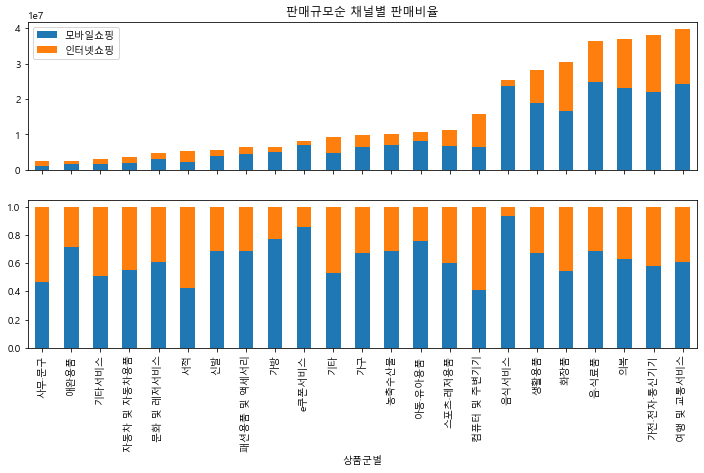

In [22]:
# 가설1. 상품 판매 규모가 클수록  특정 채널 비중이 높을 것이다.

# 상품군별 판매액 순으로 정렬하고, 매체별 비율을 도식화하여 관찰해보자.
# 아래 매체비율이 들쑥날쑥하여 판매규모와 연관성은 없어 보인다. 

fig, ax = plt.subplots(2,1, figsize = (12,12), sharex = True)

online_channel2[['모바일쇼핑','인터넷쇼핑']]\
        .plot(kind = 'bar', stacked = True, figsize = (12,6),
             title = '판매규모순 채널별 판매비율', ax=ax[0])

online_channel2[['모바일비율','인터넷비율']]\
        .plot(kind = 'bar', stacked = True, figsize = (12,6),
              ax=ax[1], legend = False)

In [23]:
# 가설2. 인터넷쇼핑을 선호하는 경우, 제품에 대한 검색이 더 필요하다 .(고관여 제품이다)

# 모바일비율별 순으로 정렬하여  관찰해보자.

online_channel3 = online_channel2.sort_values('모바일비율')
online_channel3.tail()

,모바일쇼핑,인터넷쇼핑,온라인합계,모바일비율,인터넷비율
상품군별,,,,,
애완용품,1782652.0,702446.0,2485098.0,0.717337,0.282663
아동·유아용품,8124100.0,2632083.0,10756183.0,0.755296,0.244704
가방,5041565.0,1517214.0,6558779.0,0.768674,0.231326
e쿠폰서비스,6983062.0,1158936.0,8141998.0,0.857660,0.142340
음식서비스,23623124.0,1709937.0,25333061.0,0.932502,0.067498


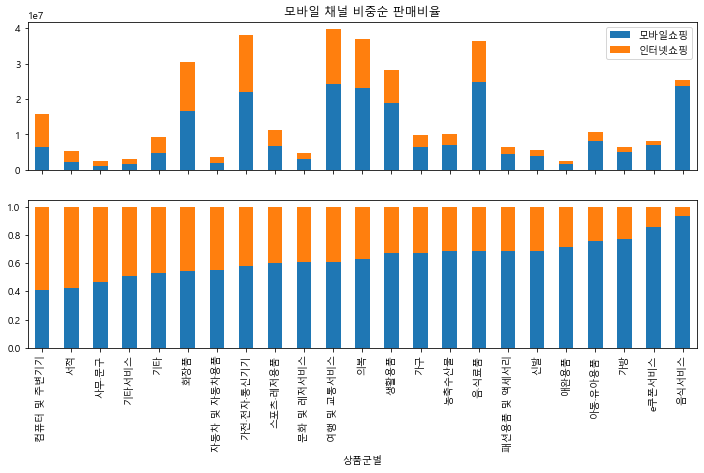

In [24]:
fig, ax = plt.subplots(2,1, figsize = (12,12), sharex = True)

online_channel3[['모바일쇼핑','인터넷쇼핑']]\
        .plot(kind = 'bar', stacked = True, figsize = (12,6),
             title = '모바일 채널 비중순 판매비율', ax=ax[0])

online_channel3[['모바일비율','인터넷비율']]\
        .plot(kind = 'bar', stacked = True, figsize = (12,6),
              ax=ax[1], legend = False)

In [25]:
# 가설2에 대해서
# 컴퓨터, 서적, 자동차 및 자동차용품, 가전 등이 인터넷 비중이 높고 고관여 제품인것 같다.
# 사무문구는 장바구니에 여러가지를 담아 pc를 사용하는것 같다. 
# 화장품도 고관여인가? 사무실에서 업무하다가 구매하나?

# 음식서비스는 압도적으로 모바일매체가 높다. 음식료, 농축수산물도 상대적으로 모바일이 높다. 
# e쿠폰도 특성상 모바일이 높다. 
# 아동 유아용품에는 기저귀, 분유 등이 포함되어, 반복 구매가 높을 수 있다. 

# 4. 판매매체별 상품군별 변화추이 분석

In [26]:
online_channel

,상품군별,판매연월,모바일쇼핑,인터넷쇼핑
0,e쿠폰서비스,2018-01-01,85532.0,20062.0
1,e쿠폰서비스,2018-02-01,108408.0,20823.0
2,e쿠폰서비스,2018-03-01,115826.0,23768.0
3,e쿠폰서비스,2018-04-01,112090.0,21048.0
4,e쿠폰서비스,2018-05-01,137108.0,31942.0
...,...,...,...,...
731,화장품,2020-04-01,366354.0,594949.0
732,화장품,2020-05-01,409988.0,524094.0
733,화장품,2020-06-01,415458.0,568552.0
734,화장품,2020-07-01,404695.0,600530.0


In [27]:
# 상품군별, 판매연월별로 매체를 컬럼으로 하여 데이터 재구성.
# 매체별 비율컬럼 추가
# ocym : online channel year month
ocym = online_channel.set_index(['상품군별','판매연월'])
ocym['온라인합계'] = ocym.모바일쇼핑 + ocym.인터넷쇼핑
ocym['모바일비율'] = ocym.모바일쇼핑 / ocym.온라인합계
ocym['인터넷비율'] = ocym.인터넷쇼핑 / ocym.온라인합계
ocym.tail()

모바일쇼핑     인터넷쇼핑      온라인합계     모바일비율     인터넷비율
상품군별 판매연월                                                         
화장품  2020-04-01  366354.0  594949.0   961303.0  0.381101  0.618899
     2020-05-01  409988.0  524094.0   934082.0  0.438921  0.561079
     2020-06-01  415458.0  568552.0   984010.0  0.422209  0.577791
     2020-07-01  404695.0  600530.0  1005225.0  0.402591  0.597409
     2020-08-01  402857.0  697767.0  1100624.0  0.366026  0.633974

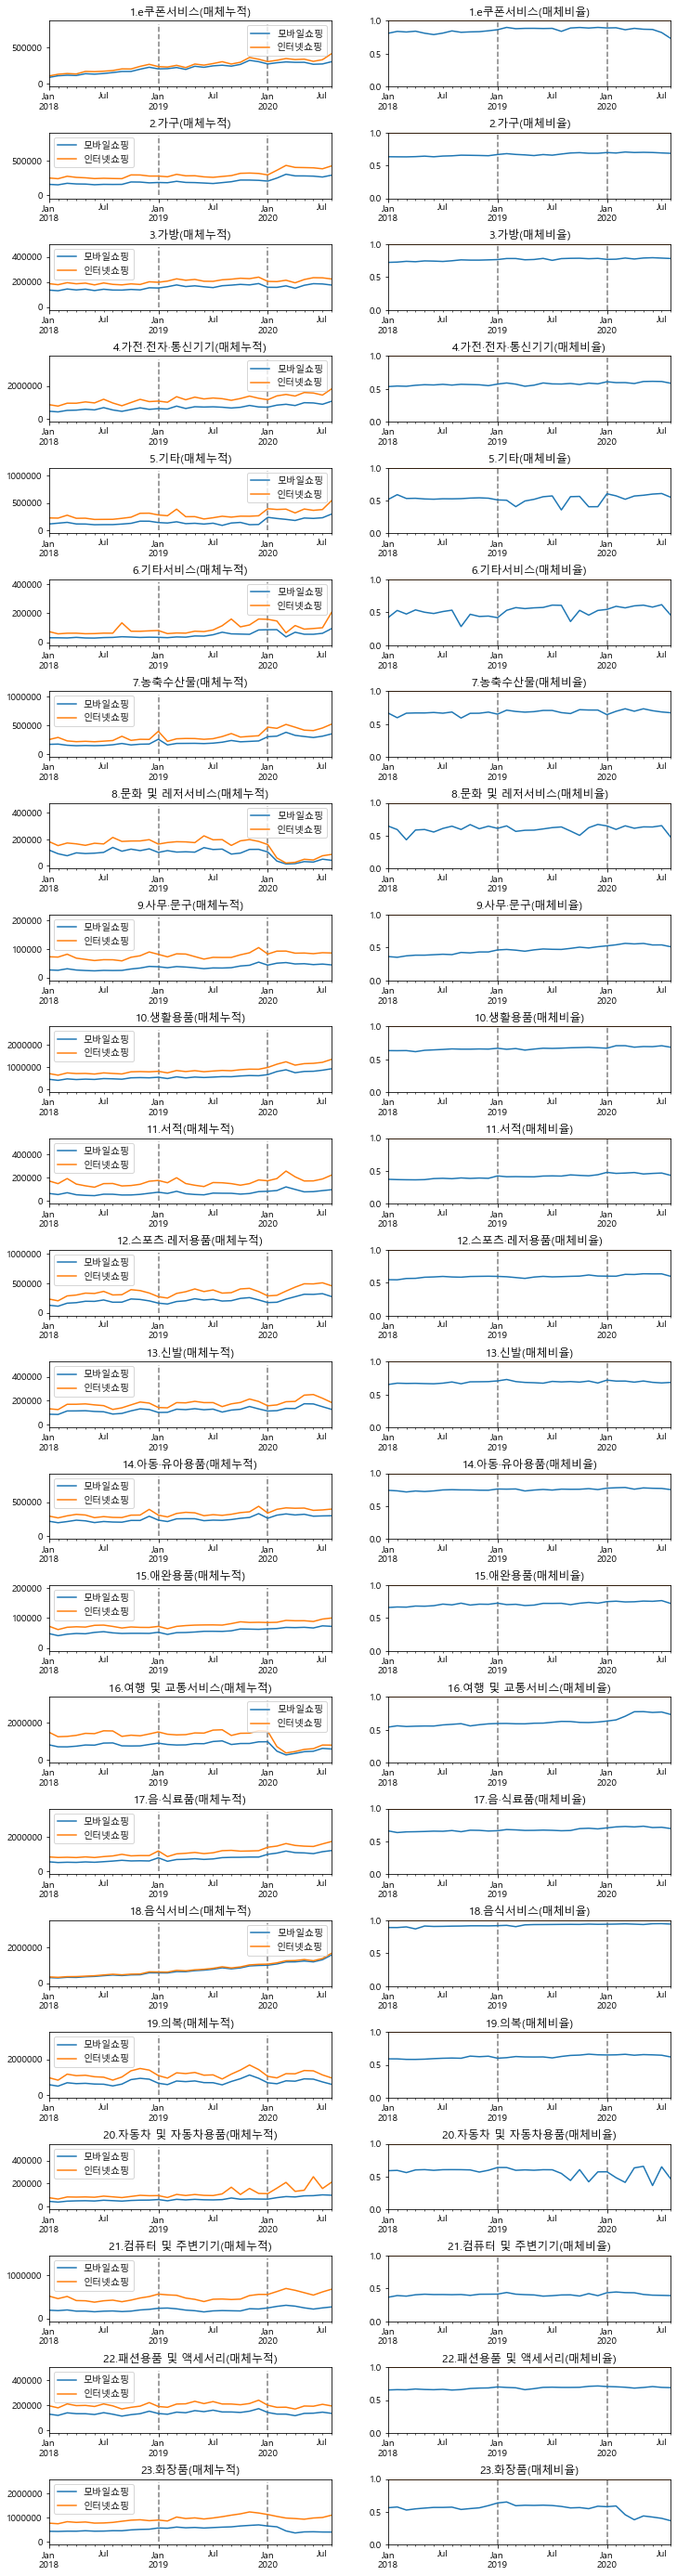

In [28]:
# 상품군별로  왼쪽은 매체별 누적,  오른쪽은 매체별 비율
#  오른쪽을 보면 간혹, 인터넷 비중이 급증 하는 경우가 보인다. 
# 20.자동차는 행사 영향이 있는 것 같다. 
# 16.여행이 코로나 이후 모바일 비율이 늘었고 (왼쪽과 조합해보면, 사실은 인터넷 비율이 확 줄어 든 것임)
# 23.화장품은 인터넷 비율이 늘었다 (왜?)


fig, ax = plt.subplots(len (online_prod.columns) ,2 , figsize = (12, 50))
plt.subplots_adjust(hspace=0.7)

x1 = np.datetime64('2019-01-01')
x2 = np.datetime64('2020-01-01')
prod_list = online_prod.columns

for i, prod in enumerate (prod_list) :
    ocym.loc[ prod][['모바일쇼핑','인터넷쇼핑']].plot(ax = ax[i][0],
                           title = str(i+1) + '.'+ prod +'(매체누적)', 
                            stacked = True)
    ocym.loc[ prod][['모바일비율','인터넷비율']].plot(
                         ax = ax[i][1],
                           title = str(i+1) + '.'+ prod + '(매체비율)', 
                            stacked = True, legend = False)
    
    ymin = ocym.loc[prod].min().min()
    ymax = ocym.loc[prod].max().max()*2
    ax[i][0].vlines(x = [x1, x2], ymin = ymin, ymax= ymax, 
                        color = 'gray', linestyle = '--')
    ax[i][1].vlines(x = [x1, x2], ymin =0, ymax= 1, 
                        color = 'gray', linestyle = '--')
    
    for j in [0,1] :
        ax[i][j].xaxis.label.set_visible(False)
        
        
    ax[i][1].set_ylim(0,1)
    